In [29]:
#Import all necessary modules and packages to perform kmeans

#For creating dataframes and handling arrays
import pandas as pd #enables use of pandas libraries with alias pd
import numpy as np #enables use of numpy libraries with alias np
import string

#For removing stopwords
from nltk.corpus import stopwords

#For word embedding using frequency/counts method
from sklearn.feature_extraction.text import CountVectorizer

#For plotting
import matplotlib.pyplot as plt

#from word embedding using TF-IDF methods
from sklearn.feature_extraction.text import TfidfVectorizer

#import os
#import re
import string
#from nltk.tokenize import word_tokenize
#from nltk.tokenize import sent_tokenize
#import nltk.corpus

#from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation

#For calculating Umass coherence
import math
from collections import defaultdict



In [31]:
#This examples uses the Peer Support Level 1 Dataset located in the Datasets Module on Canvas
# Load dataset
file_path = '/Users/airturtle/Desktop/UW/Teaching/NLP_Course/DataSets/PeerSupport/PeerSupport_Level1.xlsx'
data = pd.read_excel(file_path)
#print (data)

data_for_lda = data[['PeerSupportResponse']].copy()
#print (data_for_lda_df)
#data_for_lda_df = pd.DataFrame({'Document': [data['PeerSupportResponse']]})
#data_temp = data['PeerSupportResponse']
#print (data_temp)

# Convert all elements in data_for_lda_df into strings
#data_for_lda_df = data_for_lda_df.astype(str)
print (data_for_lda['PeerSupportResponse'])

0                                     Ask good questions
1      Reduce the amount of talking and other distrac...
2                      ask more questions during lecture
3                                Bring up more questions
4       Form study groups to understand class materials.
                             ...                        
245                   Ask all the questions all the time
246    Asking questions during lectures can help me f...
247    Ask questions during lectures if anything is n...
248    Turning on cameras helps to create the feeling...
249    Make sure to mute their mics when they are sup...
Name: PeerSupportResponse, Length: 250, dtype: object


In [33]:
#Preprocess data_for_kmeans by converting all text to lower case

# Convert all text to lower case
#data_for_lda_df.loc[:, 'LowerCase'] = data_for_lda_df.str.lower()
temp = data_for_lda['PeerSupportResponse'].str.lower()
data_for_lda.loc[:, 'LowerCase'] = temp
print (data_for_lda)

# Look at resulting text to confirm that conversion was done correctly
#print (data_for_lda_df)

                                   PeerSupportResponse  \
0                                   Ask good questions   
1    Reduce the amount of talking and other distrac...   
2                    ask more questions during lecture   
3                              Bring up more questions   
4     Form study groups to understand class materials.   
..                                                 ...   
245                 Ask all the questions all the time   
246  Asking questions during lectures can help me f...   
247  Ask questions during lectures if anything is n...   
248  Turning on cameras helps to create the feeling...   
249  Make sure to mute their mics when they are sup...   

                                             LowerCase  
0                                   ask good questions  
1    reduce the amount of talking and other distrac...  
2                    ask more questions during lecture  
3                              bring up more questions  
4     form study g

In [35]:
#Further preprocess data by removing stopwords from the data
stop = stopwords.words('english')

#Print data with no stopwords
temp = data_for_lda['LowerCase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_for_lda.loc[:, 'NoStopWords'] = temp
print (data_for_lda)

                                   PeerSupportResponse  \
0                                   Ask good questions   
1    Reduce the amount of talking and other distrac...   
2                    ask more questions during lecture   
3                              Bring up more questions   
4     Form study groups to understand class materials.   
..                                                 ...   
245                 Ask all the questions all the time   
246  Asking questions during lectures can help me f...   
247  Ask questions during lectures if anything is n...   
248  Turning on cameras helps to create the feeling...   
249  Make sure to mute their mics when they are sup...   

                                             LowerCase  \
0                                   ask good questions   
1    reduce the amount of talking and other distrac...   
2                    ask more questions during lecture   
3                              bring up more questions   
4     form st

In [37]:
#Remove punctuation from dataset

def remove_punctuation(text):
    """Removes punctuation from a string."""
    return ''.join([char for char in text if char not in string.punctuation])

data_for_lda['RemovePunctuation'] = data_for_lda['NoStopWords'].apply(remove_punctuation)
print (data_for_lda)

                                   PeerSupportResponse  \
0                                   Ask good questions   
1    Reduce the amount of talking and other distrac...   
2                    ask more questions during lecture   
3                              Bring up more questions   
4     Form study groups to understand class materials.   
..                                                 ...   
245                 Ask all the questions all the time   
246  Asking questions during lectures can help me f...   
247  Ask questions during lectures if anything is n...   
248  Turning on cameras helps to create the feeling...   
249  Make sure to mute their mics when they are sup...   

                                             LowerCase  \
0                                   ask good questions   
1    reduce the amount of talking and other distrac...   
2                    ask more questions during lecture   
3                              bring up more questions   
4     form st

In [39]:
#Create Word Embeddings using Bag of Words, TF-IDF Method

#Embed Preprocessed Documents using Bag of Words (converting to numerical data)
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2,ngram_range=(1,1),stop_words='english')
doc_term_for_lda = tfidf_vect.fit_transform(data_for_lda.loc[:, 'RemovePunctuation'])

feature_names = tfidf_vect.get_feature_names_out()
doc_term_for_lda_df = pd.DataFrame(doc_term_for_lda.toarray(), columns=feature_names)
print(doc_term_for_lda_df)
print (type (doc_term_for_lda_df))

     active  afraid  allow  answer  answering  answers  appropriate       ask  \
0       0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.359651   
1       0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.000000   
2       0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.456048   
3       0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.000000   
4       0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.000000   
..      ...     ...    ...     ...        ...      ...          ...       ...   
245     0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.389990   
246     0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.000000   
247     0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.395110   
248     0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.000000   
249     0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.000000   

       asking  assignments 

In [41]:
#Model Topics in dataset with Latent Dirichlet Allocation

#Explanation of hyperparameters:
#n_components = number of topics

#doc_topics_prior = value of alpha for dirichlet distribution of documents and topics)
#small alpha leads to fewer documents having the same topics
#large alpha leads to many documents having the same topics

#topic_word_prior = value of beta for dirichelt distribution of topics and words)
#large beta leads to more words being assigned to multiple topics
#small beta leads to fewer words being assigned to multiple topics

#learning_decay = how much the learning rate decreases with each iteration of LDA (bigger value means faster convergence)
#batch_size = parameters that influneces tradeoff between speed and convergence (higher value is faster but may not converge)
#max_iter = number of interations of LDA/Bayes algorithm; default is 10

#Create LDA Model
LDA_model = LatentDirichletAllocation(n_components=3, doc_topic_prior=1.0, topic_word_prior=1.0, learning_decay=0.7, batch_size=50, max_iter=100)
LDA_model.fit(doc_term_for_lda_df)

#Look at all the words extracted from the corpus (i.e., the document dataset)
#This is a sanity check to ensure the words extracted (and those discarded make sense
feature_names = tfidf_vect.get_feature_names_out()
print (feature_names)
print ('\n')

['active' 'afraid' 'allow' 'answer' 'answering' 'answers' 'appropriate'
 'ask' 'asking' 'assignments' 'attention' 'backgrounds' 'benefit' 'best'
 'better' 'boards' 'bring' 'calls' 'camera' 'cameras' 'chat' 'cheat'
 'clarification' 'clarify' 'clarifying' 'class' 'classes' 'collaboration'
 'come' 'comments' 'confusing' 'content' 'continue' 'conversation' 'cover'
 'curve' 'discussion' 'disrupt' 'disruptive' 'distract' 'distracting'
 'distractions' 'dont' 'dumb' 'end' 'engage' 'engaged' 'engaging'
 'environment' 'especially' 'exams' 'experience' 'feel' 'form' 'friends'
 'gets' 'good' 'group' 'groups' 'hard' 'help' 'helpful' 'helps' 'homework'
 'honest' 'hours' 'instructor' 'interact' 'interactive' 'interested'
 'kind' 'know' 'laptops' 'late' 'learn' 'learning' 'lecture' 'lectures'
 'like' 'likely' 'live' 'lot' 'loudly' 'make' 'makes' 'making' 'material'
 'maybe' 'meaningful' 'mic' 'microphone' 'microphones' 'mics' 'mute'
 'muted' 'necessary' 'new' 'nice' 'normal' 'office' 'online' 'open'
 

In [42]:
#LDA Results
#Find and Print the top (n_top_words) words for each topic
#Access the topic-word distributions 
#Each row in LDA.components_ represents a topic and the numbers in the row represent how many times a word occurs for that topic
topic_word_distributions = LDA_model.components_

#Initiate topics
k = topic_word_distributions.shape[0]
topics = [None]*k

#Map the numebrs in LDA_model.components_ back to words
feature_names = tfidf_vect.get_feature_names_out()#Retrieve the top (most frequently occurring) words for each topic
n_top_words = 8  # Number of top words to display per topic
for topic_idx, topic in enumerate(topic_word_distributions):
    # Sort words by their strength in the current topic and get their indices
    top_word_indices = topic.argsort()[:-n_top_words-1:-1]
    # Map indices back to words
    top_words = [feature_names[i] for i in top_word_indices]  
    #print (top_words)
    topics[topic_idx] = top_words
    #print (topic_idx)
    #print (top_words)
    print(f"Topic {topic_idx}: {' '.join(top_words)}")
    #topics[topic_idx] = {' '.join(top_words)}
    #top_words
top_words_topics = topics[0:3]
#print (topics[0:3])
#print (top_words_topics)

#print (topics)
#Based on these results, give the topics reasonable labels
#Topic 0:  Be Respectful
#Topic 1:  Ask Questions
#Topic 2:  Don't Be Disrputive

Topic 0: class asking respectful like study cameras groups group
Topic 1: lecture students talk talking mute professor distracting sure
Topic 2: questions ask question lectures help afraid good people


In [45]:
# LDA Results
# Here we look at the probability that a topic is represented in each document
doc_topic_dist = LDA_model.transform(doc_term_for_lda_df)

#doc_topic_dist' now contains the topic probabilities for each document.

# Look at some examples
#For the first document
print(data_for_lda.loc[0, 'RemovePunctuation'])
print(doc_topic_dist[0])

#For the tenth document
print(data_for_lda.loc[9, 'RemovePunctuation'])
print(doc_topic_dist[9])

#For the 250th document
print(data_for_lda.loc[249, 'RemovePunctuation'])
print(doc_topic_dist[249])

#For the 125th document
print(data_for_lda.loc[124, 'RemovePunctuation'])
print(doc_topic_dist[124])

#For the 64th document
print(data_for_lda.loc[63, 'RemovePunctuation'])
print(doc_topic_dist[63])
#Notice that for the first document, LDA is very certain (high probability of 0.52) that the response 
#"Ask good quesitons"corresponds to Topic 2 (Ask Questions)

#But for the tenth document, LDA is not as certain (probability of 0.41 with next highest probability 0.31
#that the response "Similarly coming to clas prepared... " belongs to Topic 2 (Ask Questions)

#And for the 249th document, LDA is again quite certian (proability of 0.56) with next highest probability 0.22
#that "Make sure mute mics..." represents Topic 1 ("Be Respectful")

ask good questions
[0.24263236 0.23955392 0.51781373]
similarly coming class prepared important extracting value classes helpful read recommended required class student better follow along ask questions engage material
[0.46592796 0.2460766  0.28799544]
make sure mute mics supposed to
[0.22793138 0.5541904  0.21787822]
ask many questions professor behind certain topics due unforseen events
[0.24482175 0.31683959 0.43833866]
disturb classmate
[0.33333333 0.33333333 0.33333333]


In [47]:
#More LDA results
#Here we can find the dominant topic for each document:
dominant_topics = np.argmax(doc_topic_dist, axis=1)
print(dominant_topics)

[2 1 2 2 0 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 0 0 1 1 2 0 2 2 2 2 0 1 2 1 1 2 2
 1 0 2 2 2 2 2 2 1 2 2 2 1 2 1 2 2 0 1 0 2 1 1 2 1 1 0 2 2 0 0 2 1 1 1 2 0
 2 2 0 1 1 0 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 2 0 2 2 2 2 0 0
 2 2 2 2 1 0 1 0 2 1 0 0 2 2 1 0 2 0 2 2 2 0 0 2 1 2 2 0 1 1 1 1 0 2 2 1 0
 2 2 2 2 0 2 1 2 0 1 1 1 2 1 2 0 1 1 1 0 1 0 2 0 0 1 0 2 1 0 2 0 0 1 1 2 1
 2 0 0 1 0 0 0 0 0 1 2 0 0 1 1 1 1 1 0 1 2 1 1 2 0 0 0 0 2 0 0 0 2 1 1 0 2
 2 0 1 0 0 0 0 2 2 0 1 2 1 0 1 0 2 0 1 1 2 1 2 2 2 2 0 1]


In [49]:
#More LDA Results
#Look at how many responses were assigned to each topic

#Assign each response to its corresponding LDA topic (by the highest probability found for each document)
topic_assignments = LDA_model.transform(doc_term_for_lda_df)
topic_labels = np.argmax(topic_assignments, axis=1)

#Count the occurrences of each topic label
topic_counts = np.bincount(topic_labels)

#Print the number of responses in each category
for i, count in enumerate(topic_counts):
    print(f'Topic/Category {i}: {count} responses')

Topic/Category 0: 70 responses
Topic/Category 1: 70 responses
Topic/Category 2: 110 responses


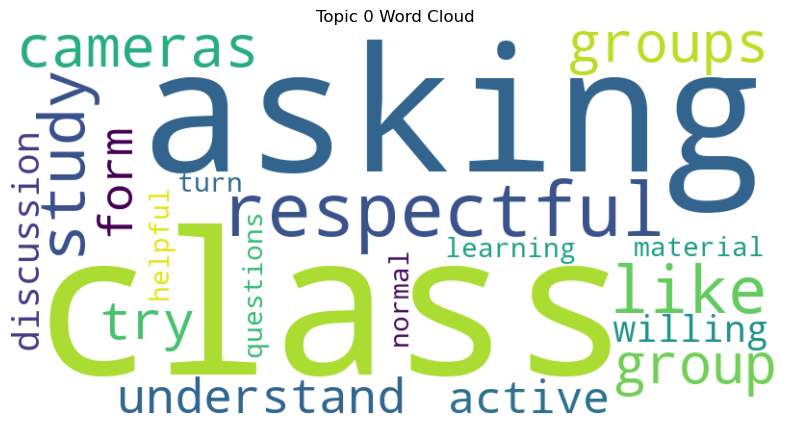

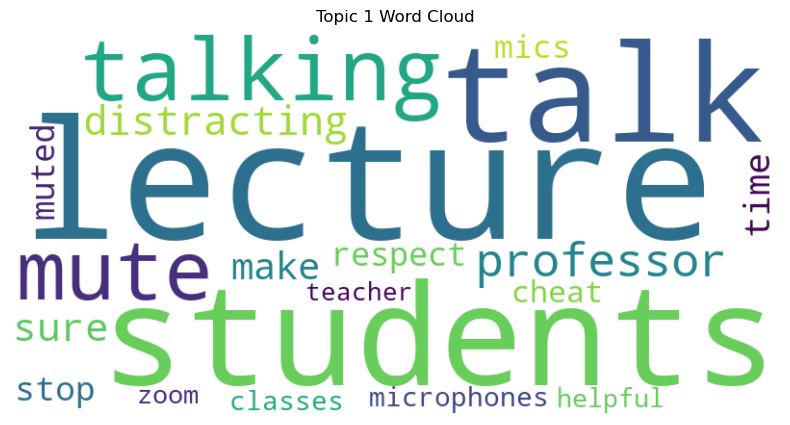

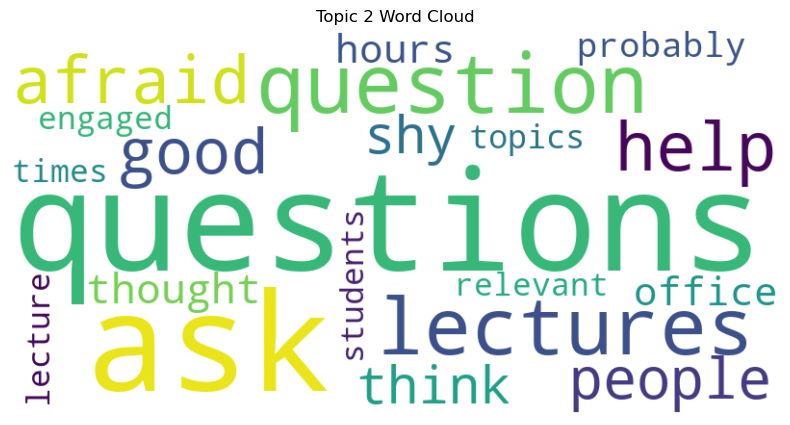

In [51]:
#More LDA Results
#Print Word Clouds for each topic
feature_names = tfidf_vect.get_feature_names_out()
top_words_per_topic = []

for topic_idx, topic in enumerate(LDA_model.components_):
        top_words_indices = topic.argsort()[-20:][::-1] # Get indices of top 10 words
        top_words = [(feature_names[i], topic[i]) for i in top_words_indices]
        top_words_per_topic.append(top_words)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, topic_words in enumerate(top_words_per_topic):
        # Create a dictionary of words and their weights/frequencies
        word_freq_dict = {word: weight for word, weight in topic_words}
        if i == 0:
         wc0 = word_freq_dict
        if i==1:
         wc1 = word_freq_dict
        if i == 2:
            wc2 = word_freq_dict

# Generate the word cloud for Topic 0
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wc0)
#Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Topic 0 Word Cloud')
plt.axis('off')
plt.show()

# Generate the word cloud for Topic 1
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wc1)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Topic 1 Word Cloud')
plt.axis('off')
plt.show()

# Generate the word cloud for Topic 2
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wc2)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Topic 2 Word Cloud')
plt.axis('off')
plt.show()

In [ ]:
#Calculate Topic Coherence (UMass) from the underlying formula

corpus_documents = data_for_lda.loc[:, 'RemovePunctuation'].str.split()

def calculate_umass_coherence(topics, corpus_documents):
    """
    Calculates UMass topic coherence manually.

    Args:
        topics (list of list of str): A list where each inner list represents a topic
                                      and contains its top words.
        corpus_documents (list of list of str): A list where each inner list represents
                                                a document and contains its tokens.

    Returns:
        float: The average UMass coherence score across all topics.
    """

    # 1. Calculate D(w) and D(w_i, w_j)
    doc_freq = defaultdict(int)
    co_occurrence_freq = defaultdict(lambda: defaultdict(int))

    for doc in corpus_documents:
        unique_words_in_doc = list(set(doc)) # Consider only unique words per document for D(w) and D(w_i, w_j)
        for i, word_i in enumerate(unique_words_in_doc):
            doc_freq[word_i] += 1
            for j in range(i + 1, len(unique_words_in_doc)):
                word_j = unique_words_in_doc[j]
                co_occurrence_freq[word_i][word_j] += 1
                co_occurrence_freq[word_j][word_i] += 1 # Symmetric

    topic_coherence_scores = []
    for topic_words in topics:
        topic_pmi_sum = 0
        pair_count = 0
        
        # Calculate PMI for all unique pairs within the topic
        for i, word_i in enumerate(topic_words):
            for j in range(i + 1, len(topic_words)):
                word_j = topic_words[j]

                # Ensure words are in our corpus and have frequencies
                if word_i in doc_freq and word_j in doc_freq:
                    # Smoothing: Add 1 to co-occurrence if it's zero
                    co_occurrence = co_occurrence_freq[word_i][word_j]
                    
                    # UMass uses log((D(w_i, w_j) + 1) / (D(w_i) * D(w_j)))
                    # Note: Gensim's UMass uses log((D(w_i, w_j) + 1) / D(w_i)) in some contexts,
                    # but the general formula includes D(w_j) in the denominator.
                    # The exact formula can vary slightly across implementations.
                    
                    # For a common UMass variant, we use: log((D(w_i, w_j) + 1) / D(w_i))
                    # This is often the Gensim-like approach for UMass.
                    if doc_freq[word_i] > 0: # Avoid division by zero
                        pmi = math.log((co_occurrence + 1) / doc_freq[word_i])
                        topic_pmi_sum += pmi
                        pair_count += 1

        if pair_count > 0:
            topic_coherence_scores.append(topic_pmi_sum / pair_count)
        else:
            topic_coherence_scores.append(0) # Or handle as appropriate

    if topic_coherence_scores:
        return topic_coherence_scores, sum(topic_coherence_scores) / len(topic_coherence_scores)
        #return sum(topic_coherence_scores) / len(topic_coherence_scores)
    else:
        return 0.0


# Calculating UMass for LDA Model Results
print (corpus_documents)
print (top_words_topics)
# The following returns the Umass Coherence values for each topic and the aggregate Umass topic coherence
coherence = calculate_umass_coherence(top_words_topics, corpus_documents)
print(f"UMass Coherence: {coherence}")



[['apple', 'banana', 'fruit'], ['apple', 'orange', 'fruit'], ['car', 'truck', 'vehicle'], ['banana', 'smoothie']]
[['apple', 'banana', 'fruit'], ['car', 'truck']]
UMass Coherence: ([0.1351550360360548, 0.6931471805599453], 0.41415110829800006)
0                                 [ask, good, questions]
1         [reduce, amount, talking, distractions, class]
2                              [ask, questions, lecture]
3                                     [bring, questions]
4      [form, study, groups, understand, class, mater...
                             ...                        
245                               [ask, questions, time]
246    [asking, questions, lectures, help, find, part...
247    [ask, questions, lectures, anything, explained...
248    [turning, cameras, helps, create, feeling, nor...
249               [make, sure, mute, mics, supposed, to]
Name: RemovePunctuation, Length: 250, dtype: object
[['class', 'students', 'respectful', 'like', 'study', 'cameras', 'cheat', 're